In [2]:
!pip install pyreadr

     |████████████████████████████████| 1.2 MB 4.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 10.4 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /home/geev/Research/Transgression/tenv/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-13644gq8/pyreadr_5d70d78541754b8691da00c91c1e3caf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-13644gq8/pyreadr_5d70d78541754b8691da00c91c1e3caf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-r5z1s6qn
         cwd: /tmp/pip-install-13644gq8/pyreadr_5d70d78541754b8691da00

## Gathering all follower data into one csv file

In [3]:
import os
import pyreadr
import pandas as pd
from tqdm import tqdm

In [4]:
follower_dir = "./Barbera Political Ideology/poli_account_followers/followers-lists-202008"

In [5]:
follower_files = os.listdir(follower_dir)

In [6]:
len(follower_files)

460

In [5]:
followers_dict = {"account":[], "id_str":[]}
for follower_file in tqdm(follower_files):
    followers = pyreadr.read_r(os.path.join(follower_dir, follower_file))["followers"]["followers"]
    followers_dict["account"].extend([follower_file.split(".")[0]]*len(followers))
    followers_dict["id_str"].extend(followers)


100%|██████████| 460/460 [00:17<00:00, 26.57it/s]


In [111]:
pd.DataFrame(followers_dict).to_csv("./{}_account_followers.csv".format(len(follower_files)), index=False)

## Creating adjacency matrix for condemnation dataset users

In [6]:
# finding the users
import pickle
import numpy as np
# open a file, where you stored the pickled data
# pred_data_path = '../../data/5_mil_7days_metoo.p'
# file = open(pred_data_path, 'rb')
# pred_data = pickle.load(file)
# file.close()
pred_data = pd.read_csv("../data/filtered_condemnation_RTs.csv")

In [7]:
pred_data

,_id,postedTime,retweetCount,favoritesCount,severity_prediction,condemnation_prediction,RT_user_id,user_id,time_check,body_target_mentions,quoted_status_target_mentions,gnip_url_title_mentions,time_valid,targets
0,6234d6c81c978b7d87a676fa,2017-11-10 02:45:17,390,557,1.0,1,2.496335e+09,776493304791855104,"{'louis_ck': {'valid': True, 'public_date': da...","['louis_ck', 'halperin', 'weinstein', 'spacey'...",NaN,[],True,"['louis_ck', 'halperin', 'weinstein', 'spacey'..."
1,6234d6c81c978b7d87a676ff,2017-11-10 02:49:54,2089,10752,1.0,1,2.893428e+08,14896102,"{'louis_ck': {'valid': True, 'public_date': da...",['louis_ck'],NaN,NaN,True,['louis_ck']
2,6234d6c81c978b7d87a67703,2017-11-10 02:49:58,533,1131,1.0,1,8.148267e+07,158451341,"{'louis_ck': {'valid': True, 'public_date': da...",['louis_ck'],NaN,NaN,True,['louis_ck']
3,6234d6c81c978b7d87a67704,2017-11-10 02:49:58,77,201,1.0,1,4.280735e+09,771355205443149824,"{'louis_ck': {'valid': True, 'public_date': da...","['louis_ck', 'weinstein', 'spacey', 'toback', ...","['louis_ck', 'weinstein', 'spacey', 'toback']",NaN,True,"['louis_ck', 'weinstein', 'spacey', 'toback']"
4,6234d6c81c978b7d87a67708,2017-11-10 02:49:04,2084,10738,1.0,1,2.893428e+08,819667363545174023,"{'louis_ck': {'valid': True, 'public_date': da...",['louis_ck'],NaN,NaN,True,['louis_ck']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072270,623538a01c978b7d8784407c,2017-10-06 21:18:57,190,224,1.0,1,1.611633e+08,830109389230977024,"{'weinstein': {'valid': True, 'public_date': d...","['weinstein', 'weinstein', 'weinstein']",NaN,['weinstein'],True,['weinstein']
3072271,623538a01c978b7d8784407f,2017-10-06 21:19:40,725,1668,1.0,1,6.724252e+06,22328632,"{'weinstein': {'valid': True, 'public_date': d...","['weinstein', 'weinstein']",['weinstein'],NaN,True,['weinstein']
3072272,623538a01c978b7d87844081,2017-10-06 21:19:49,726,1669,1.0,1,6.724252e+06,486995811,"{'weinstein': {'valid': True, 'public_date': d...","['weinstein', 'weinstein']",['weinstein'],NaN,True,['weinstein']
3072273,623538a01c978b7d87844082,2017-10-06 21:19:54,1,0,0.0,1,8.162911e+17,784907880394743808,"{'weinstein': {'valid': True, 'public_date': d...",['weinstein'],NaN,NaN,True,['weinstein']


In [7]:
#loading the political account followers csv
followers_df = pd.read_csv("./460_account_followers.csv")
followers_df

,account,id_str
0,RoyBlunt,1434201858864726019
1,RoyBlunt,1469657120283009025
2,RoyBlunt,1373365280508809219
3,RoyBlunt,1262788067057979395
4,RoyBlunt,1470943571180150787
...,...,...
22230396,RepAnthonyBrown,713094905552248832
22230397,RepAnthonyBrown,1408858718
22230398,RepAnthonyBrown,19650150
22230399,RepAnthonyBrown,22781325


In [9]:
id_type = "RT_user_id"

In [10]:
# Trying join on dfs
user_ids = list(np.int64(id) for id in set(pred_data[id_type].dropna()))
user_id_df = pd.DataFrame({"id_str":user_ids})
user_id_df

,id_str
0,783860042445357056
1,756547846824787968
2,792205876664860672
3,859464183515054080
4,3524001795
...,...
73568,714003021412364288
73569,21626875
73570,34209788
73571,42074109


In [16]:
len(user_ids)

73573

In [9]:
user_id_df = pd.read_csv("../../jason_users.csv")

In [10]:
user_id_df.drop

,user.id_str
0,3120474556
1,3499689988
2,890938592436080640
3,3091977599
4,3439056192
...,...
22603057,126460718
22603058,350597282
22603059,761382188961136640
22603060,632704303


In [13]:
unique_user_id_df = user_id_df.drop_duplicates()

In [14]:
unique_user_id_df

,user.id_str
0,3120474556
1,3499689988
2,890938592436080640
3,3091977599
4,3439056192
...,...
22602973,755048916706394112
22602977,1078755835
22603001,997263957911097344
22603022,3989820324


In [17]:
followers_df

,account,id_str
0,RoyBlunt,1434201858864726019
1,RoyBlunt,1469657120283009025
2,RoyBlunt,1373365280508809219
3,RoyBlunt,1262788067057979395
4,RoyBlunt,1470943571180150787
...,...,...
22230396,RepAnthonyBrown,713094905552248832
22230397,RepAnthonyBrown,1408858718
22230398,RepAnthonyBrown,19650150
22230399,RepAnthonyBrown,22781325


In [11]:
accounts_who_follow_poli = set(followers_df.id_str)

In [12]:
len(accounts_who_follow_poli)

6993089

In [20]:
len(user_ids)

73573

,user.id_str
0,3120474556
1,3499689988
2,890938592436080640
3,3091977599
4,3439056192
...,...
22602973,755048916706394112
22602977,1078755835
22603001,997263957911097344
22603022,3989820324


In [21]:
non_poli_users = []
poli_users = []

user_ids = unique_user_id_df["user.id_str"]

for user_id in tqdm(user_ids):
    if user_id in accounts_who_follow_poli:
        poli_users.append(user_id)
    else:
        non_poli_users.append(user_id)
len(non_poli_users)

100%|██████████| 3105601/3105601 [00:01<00:00, 1664370.52it/s]


2455871

In [21]:
non_poli_users = []
poli_users = []
for user_id in tqdm(user_ids):
    if user_id in accounts_who_follow_poli:
        poli_users.append(user_id)
    else:
        non_poli_users.append(user_id)
len(non_poli_users)

100%|██████████| 73573/73573 [00:00<00:00, 1383918.49it/s]


49570

In [18]:
non_poli_users[0]

3120474556

In [19]:
len(poli_users)

649730

In [119]:
poli_follower_ids = list(followers_df.id_str)

In [121]:
type(poli_follower_ids[0])

int

In [123]:
111149056 in poli_follower_ids

False

In [20]:
followers_df

,account,id_str
0,RoyBlunt,1434201858864726019
1,RoyBlunt,1469657120283009025
2,RoyBlunt,1373365280508809219
3,RoyBlunt,1262788067057979395
4,RoyBlunt,1470943571180150787
...,...,...
22230396,RepAnthonyBrown,713094905552248832
22230397,RepAnthonyBrown,1408858718
22230398,RepAnthonyBrown,19650150
22230399,RepAnthonyBrown,22781325


In [22]:
filtered_followers_df = followers_df[followers_df.id_str.isin(user_ids)]

In [23]:
len(set(filtered_followers_df.id_str))

649730

In [28]:
unique_user_id_df = unique_user_id_df.rename(columns={"user.id_str":"id_str"})
join_df = pd.merge(followers_df, unique_user_id_df, how="inner", on="id_str")

In [29]:
join_df

,account,id_str
0,RoyBlunt,20230439
1,MartinHeinrich,20230439
2,RepTimBurchett,20230439
3,SenRubioPress,20230439
4,RepRubenGallego,20230439
...,...,...
3883305,RepAnthonyBrown,3180852639
3883306,RepAnthonyBrown,451776738
3883307,RepAnthonyBrown,2577253676
3883308,RepAnthonyBrown,363876606


In [24]:
join_df = pd.merge(followers_df, user_id_df, how="inner", on="id_str")

KeyError: 'id_str'

In [88]:
user_ids = list(np.int64(id) for id in set(filtered_followers_df["id_str"].dropna()))
len(user_ids)

210872

In [57]:
join_df

,account,id_str
0,RoyBlunt,18248053
1,RepYoungKim,18248053
2,SenatorRisch,18248053
3,RepJeffDuncan,18248053
4,SenMarkey,18248053
...,...,...
1496338,RepAnthonyBrown,634649409
1496339,RepAnthonyBrown,128889421
1496340,RepAnthonyBrown,141766938
1496341,RepAnthonyBrown,224703460


---------

In [30]:
poli_accounts = join_df["account"].unique()

In [31]:
poli_accounts

array(['RoyBlunt', 'MartinHeinrich', 'RepTimBurchett', 'SenRubioPress',
       'RepRubenGallego', 'gillibrandny', 'SenatorRisch', 'SenatorBurr',
       'SenatorShaheen', 'SenatorBaldwin', 'SenKevinCramer', 'SenShelby',
       'SenJackReed', 'SenCapito', 'ChrisVanHollen', 'SenJohnBarrasso',
       'SenDanSullivan', 'senrobportman', 'MikeCrapo', 'JohnBoozman',
       'SenJohnThune', 'JerryMoran', 'SteveDaines', 'SenAngusKing',
       'SenatorRounds', 'RepCori', 'RepStephMurphy', 'RepJimBanks',
       'RepGregSteube', 'RepMaryMiller', 'SenToddYoung', 'RepJeffDuncan',
       'RepTonyGonzales', 'SenatorFischer', 'RepThomasMassie',
       'RepPfluger', 'RepMoBrooks', 'RepScottPerry', 'RepJohnJoyce',
       'RepCawthorn', 'RepBrianMast', 'CongressmanHice',
       'MarshaBlackburn', 'RepBoebert', 'RepTedBudd', 'RepChipRoy',
       'RepWesterman', 'RepJohnRose', 'RepStefanik', 'LeaderHoyer',
       'SenMarkey', 'ChrisCoons', 'RepBryanSteil', 'SenJoniErnst',
       'RepBowman', 'SenJohnHoeven', 

In [32]:
# creating a matrix of all zeros rows=user_ids  cols=poli_account_names
adj_matrix = pd.DataFrame(0, index=join_df["id_str"].unique(), columns=join_df["account"].unique())

In [33]:
adj_matrix

,RoyBlunt,MartinHeinrich,RepTimBurchett,SenRubioPress,RepRubenGallego,gillibrandny,SenatorRisch,SenatorBurr,SenatorShaheen,SenatorBaldwin,...,RepMrvan,RepDwightEvans,RepKweisiMfume,Kilili_Sablan,RepAmata,RepAnnieKuster,GuamCongressman,EconUS,SenMurphyOffice,BlumenauerMedia
20230439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2177550343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906055412092473344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2861069906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15042333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180852639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451776738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2577253676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363876606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
for poli_account in tqdm(join_df["account"].unique()):
    followers_in_users = join_df[join_df["account"]==poli_account]["id_str"]
    adj_matrix[poli_account][followers_in_users]=1

100%|██████████| 460/460 [01:19<00:00,  5.81it/s]


In [39]:
adj_matrix

,RoyBlunt,MartinHeinrich,RepTimBurchett,SenRubioPress,RepRubenGallego,gillibrandny,SenatorRisch,SenatorBurr,SenatorShaheen,SenatorBaldwin,...,RepMrvan,RepDwightEvans,RepKweisiMfume,Kilili_Sablan,RepAmata,RepAnnieKuster,GuamCongressman,EconUS,SenMurphyOffice,BlumenauerMedia
20230439,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2177550343,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
906055412092473344,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2861069906,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15042333,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180852639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451776738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2577253676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363876606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NameError: name 'id_type' is not defined

In [40]:
adj_matrix.to_csv("./jason_adjacency_{}_poli_accounts.csv".format(len(adj_matrix.columns)))

In [37]:
!pwd

/home/geev/Research/Transgression/transgressions-condemnation/Ideology


(array([809.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  26.2,  52.4,  78.6, 104.8, 131. , 157.2, 183.4, 209.6,
        235.8, 262. ]),
 <BarContainer object of 10 artists>)

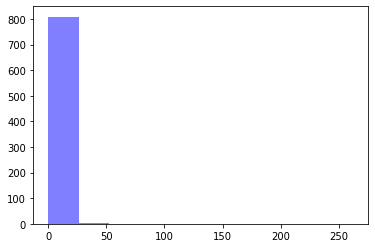

In [95]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.hist(matched_count, facecolor='blue', alpha=0.5)

In [77]:
user_id =user_ids[4]

In [78]:
user_id

'612799235'

In [79]:
followers_df[followers_df["id_str"]==user_id]

,Unnamed: 0,account,id_str


In [26]:
os.listdir("./Barbera Political Ideology/poli_account_followers/")

['followers-lists-202008csvsRepBonnie.csv',
 'followers-lists-202008csvsSenAlexPadilla.csv',
 'followers-lists-202008csvsRepTeresaLF.csv',
 'followers-lists-202008csvsRepBrianMast.csv',
 'followers-lists-202008csvsRepTrey.csv',
 'followers-lists-202008csvsRepBoebert.csv',
 'followers-lists-202008csvsRepHuizenga.csv',
 'followers-lists-202008csvsRepDavidEPrice.csv',
 'followers-lists-202008csvsRepSylviaGarcia.csv',
 'followers-lists-202008csvsSenJoniErnst.csv',
 'followers-lists-202008csvsRepKweisiMfume.csv',
 'followers-lists-202008csvsRepDustyJohnson.csv',
 'followers-lists-202008csvsRepVanTaylor.csv',
 'followers-lists-202008csvsRepGregSteube.csv',
 'followers-lists-202008csvsRepHuffman.csv',
 'followers-lists-202008csvsSenatorShaheen.csv',
 'followers-lists-202008csvsRepFranklin.csv',
 'followers-lists-202008csvsRepWexton.csv',
 'followers-lists-202008csvsSenatorSinema.csv',
 'followers-lists-202008csvsRepFitzgerald.csv',
 'followers-lists-202008csvsUSRepGaryPalmer.csv',
 'followers

In [27]:
pd.read_csv("./Barbera Political Ideology/poli_account_followers/followers-lists-202008csvsRepBonnie.csv")

,RDX3
0,X
1,NaN
2,2826598392
3,2804036809
4,2894071885
...,...
9080,2388721866
9081,2162493972
9082,2225514206
9083,1201878402
